In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
sns.set_theme(style="whitegrid")


In [2]:
df = pd.read_csv('../../data/FimaNfipClaims.csv')

In [3]:
print(df.shape)

(2570089, 40)


In [4]:
#some date analysis
print( df.dateOfLoss.min()) 
print( df.dateOfLoss.max()) 


1970-08-31T00:00:00.000Z
2022-04-14T00:00:00.000Z


In [5]:
df.head()

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2021-07-24T00:00:00.000Z,NaN,1.0,Temporarily Unavailable,N,1.0,24033.0,5.0,2007-01-01T00:00:00.000Z,...,0.0,7,0.0,MD,100000.0,40000.0,2007,20745.0,1.0,babe8abc-eae6-49f4-a5d6-b892b1087a45
1,0.0,2021-07-24T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,30009.0,NaN,2011-07-12T00:00:00.000Z,...,0.0,1,0.0,MT,150000.0,0.0,2011,59068.0,1.0,dbc2a6cc-192f-47ee-bd3c-e76bcc6a2350
2,0.0,2021-11-20T00:00:00.000Z,50.0,NaN,Temporarily Unavailable,N,1.0,48201.0,5.0,2001-06-09T00:00:00.000Z,...,1.0,1,0.0,TX,25000.0,25000.0,2001,77025.0,1.0,547d731b-b35f-4d60-a903-15cc8a4d12df
3,0.0,2021-11-20T00:00:00.000Z,9.0,NaN,Temporarily Unavailable,N,1.0,12103.0,5.0,1996-10-07T00:00:00.000Z,...,0.0,1,0.0,FL,150000.0,35000.0,1996,33702.0,1.0,18e7a2e8-5b52-4cdd-82a2-9112dbbc953b
4,0.0,2021-11-20T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,24029.0,NaN,2003-09-19T00:00:00.000Z,...,0.0,1,0.0,MD,75000.0,10000.0,2003,21620.0,0.0,40c5393a-03a4-41ed-8fb3-4b3de1e28534


In [6]:
df.dtypes

agricultureStructureIndicator                 float64
asOfDate                                       object
baseFloodElevation                            float64
basementEnclosureCrawlspace                   float64
reportedCity                                   object
condominiumIndicator                           object
policyCount                                   float64
countyCode                                    float64
communityRatingSystemDiscount                 float64
dateOfLoss                                     object
elevatedBuildingIndicator                     float64
elevationCertificateIndicator                 float64
elevationDifference                           float64
censusTract                                   float64
floodZone                                      object
houseWorship                                  float64
latitude                                      float64
longitude                                     float64
locationOfContents          

In [7]:
df[['latitude','longitude']]

,latitude,longitude
0,38.8,-77.0
1,45.2,-109.2
2,29.7,-95.4
3,27.9,-82.6
4,39.1,-76.1
...,...,...
2570084,35.6,-75.5
2570085,43.6,-84.3
2570086,35.3,-78.0
2570087,34.4,-77.6


In [8]:
#see which years have data: 
agg= df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'count'})
print(agg.head(10))
#crop to after 1975 
df = df.loc[df['yearOfLoss']>=1975]

            amountPaidOnBuildingClaim
yearOfLoss                           
1970                                0
1972                                0
1973                                3
1974                                4
1975                               20
1976                               36
1977                             3503
1978                            25352
1979                            61512
1980                            36459


Text(0.5, 1.0, 'claims amt')

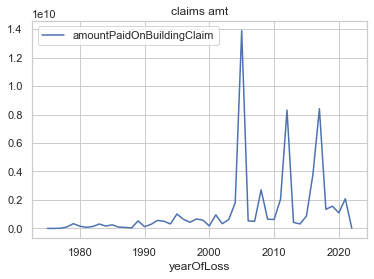

In [9]:
#amount paid by year 
df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'sum'}).plot()
plt.title('claims amt')

Text(0.5, 1.0, 'claims count')

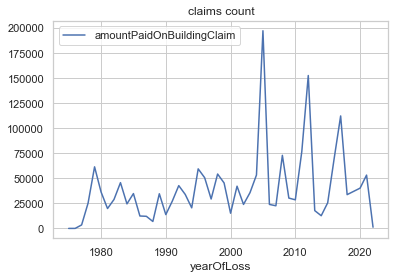

In [10]:
#number of claims by year 
df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'count'}).plot()
plt.title('claims count')

In [28]:
#amount paid by year and state 
df1 = df.loc[df['state']=='FL']
df1.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'sum'}).to_clipboard()

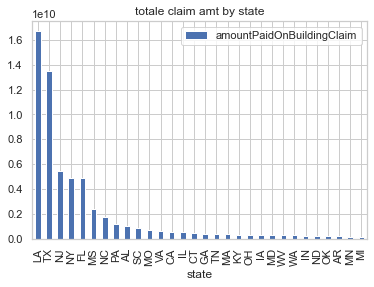

In [17]:
#number of claims by state 
agg= df.groupby('state').agg({'amountPaidOnBuildingClaim':'sum'})
agg.sort_values(by='amountPaidOnBuildingClaim', ascending=False).head(30).plot(kind='bar')
plt.title('totale claim amt by state')

agg.sort_values(by='amountPaidOnBuildingClaim', ascending=False).head(30).to_clipboard()


In [12]:
#figure out which is paid which is coverage 
df[['totalBuildingInsuranceCoverage','amountPaidOnBuildingClaim']].head()

,totalBuildingInsuranceCoverage,amountPaidOnBuildingClaim
0,100000.0,NaN
1,150000.0,593.50
2,25000.0,NaN
3,150000.0,NaN
4,75000.0,31311.04


            amountPaidOnBuildingClaim
yearOfLoss                           
1970                                0
1972                                0
1973                                3
1974                                4
1975                               20
1976                               36
1977                             3503
1978                            25352
1979                            61512
1980                            36459


<AxesSubplot:xlabel='state'>

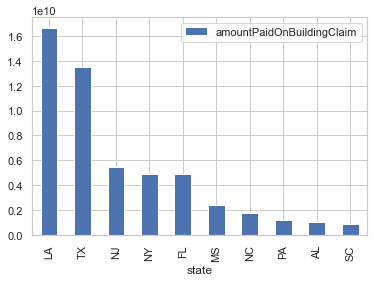

In [46]:
#compute the historical mean and average for each state 
df = pd.read_csv('../../data/FimaNfipClaims.csv')
pd.set_option('display.max_columns', None)

#see which years have data: 
agg= df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'count'})
print(agg.head(10))
#crop to after 1975 
df = df.loc[df['yearOfLoss']>=1975]

#drop rows with empty claim amount 
df = df.dropna(subset=['amountPaidOnBuildingClaim']) 

#crop states that do not have a lot of data 
df = df.loc[~df['state'].isin(['MP','AS','GU','DC',np.nan])]

#number of claims by state 
agg= df.groupby('state').agg({'amountPaidOnBuildingClaim':'sum'})

#get the list of costliest states 
agg10 = agg.sort_values(by='amountPaidOnBuildingClaim', ascending=False).head(10)
ls = agg.sort_values(by='amountPaidOnBuildingClaim', ascending=False).head(10).index.tolist()

agg10.sort_values(by='amountPaidOnBuildingClaim', ascending=False).plot(kind='bar')
# plt.title(' claim amt by state')

In [60]:
ls

['LA', 'TX', 'NJ', 'NY', 'FL', 'MS', 'NC', 'PA', 'AL', 'SC']

[Text(0.5, 1.0, 'Mean value of claims of top 10 states')]

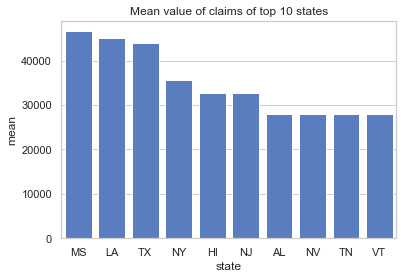

In [29]:
#number of claims by state 
agg1= df.groupby('state').agg({'amountPaidOnBuildingClaim':'mean'}).rename(columns={'amountPaidOnBuildingClaim':'mean'})
agg1 = agg1.sort_values(by='mean', ascending=False).reset_index()
agg1 = agg1.loc[agg1['state'].isin(ls)]


#number of claims by state 
agg2= df.groupby('state').agg({'amountPaidOnBuildingClaim':'max'}).rename(columns={'amountPaidOnBuildingClaim':'max'})
agg2 = agg2.sort_values(by='max', ascending=False).reset_index()
agg2 = agg2.loc[agg2['state'].isin(ls)]



agg3 = pd.merge(agg2, agg1, on="state").sort_values(by='mean', ascending=False)


# Initialize the matplotlib figure
sns.barplot(x="state", y="mean", data=agg3, color="b").set(title='Mean value of claims of top 10 states')
# plt.savefig('figs_insur/mean_top_10_state.png')

In [59]:

agg1= df.groupby('state').agg({'amountPaidOnBuildingClaim':['max','mean','std','median']}).astype(int)
# .rename(columns={'amountPaidOnBuildingClaim':'mean'})
agg1 = agg1.loc[ls]
agg1

amountPaidOnBuildingClaim                     
                            max   mean    std median
state                                               
LA                      3763390  45084  58467  20583
TX                      8973270  44046  65420  19801
NJ                      4022518  32727  58000  13042
NY                      9467720  35725  74510  13306
FL                      9100033  25351  63809   8052
MS                     10000000  46603  94924  14823
NC                      1294678  21725  41345   7992
PA                      1889793  19040  41943   6939
AL                      4900000  28059  95474   8466
SC                      1764000  25574  43752  10088

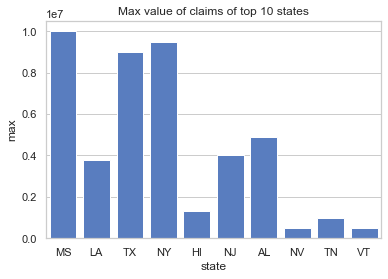

In [30]:
# Initialize the matplotlib figure
sns.barplot(x="state", y="max", data=agg3, color="b").set(title='Max value of claims of top 10 states')
plt.savefig('figs_insur/max_top_10_state.png')

In [32]:
agg3

,state,max,mean
0,MS,10000000.00,46603.080852
5,LA,3763390.21,45084.634050
2,TX,8973270.11,44046.927571
1,NY,9467720.05,35725.411742
6,HI,1340000.00,32778.120179
4,NJ,4022518.64,32727.232165
3,AL,4900000.00,28059.958432
9,NV,500000.00,28053.320059
7,TN,973885.43,27925.998341
8,VT,500000.00,27866.486148


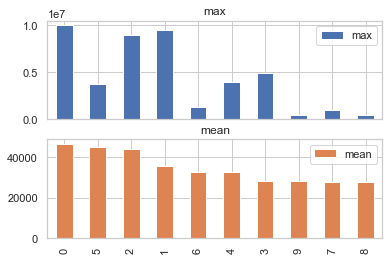

In [31]:
agg3.plot(kind='bar',grid=True,subplots=True,sharex=True); 


AttributeError: 'function' object has no attribute 'plot'

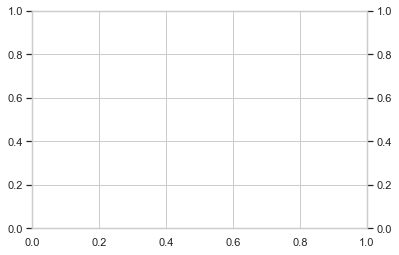

In [36]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

# agg3 = agg3.set_index('state') 

agg3.mean.plot(kind='bar', color='red', ax=ax, width=width, position=1)
agg3.max.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

plt.show()

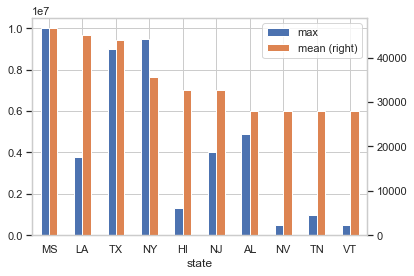

In [40]:
agg3.plot(kind= 'bar' , secondary_y= 'mean' , rot= 0 )
# plt.title()
plt.show()

ValueError: 'x' and 'y' must have the same size

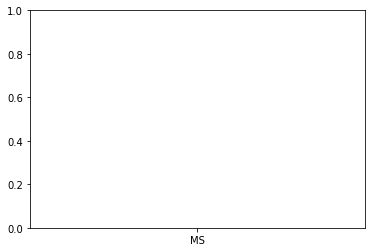

In [19]:
import matplotlib.pyplot as plt
import numpy as np

agg1= df.groupby('state').agg({'amountPaidOnBuildingClaim':'mean'}).rename(columns={'amountPaidOnBuildingClaim':'mean'})
agg1 = agg1.sort_values(by='mean', ascending=False).reset_index()
# agg1 = agg1.loc[agg1['state'].isin(ls)]



# # construct some data like what you have:
# mins = agg1.min(0)
# maxes = x.max(0)
# means = x.mean(0)
# std = x.std(0)

# # create stacked errorbars:
plt.errorbar(agg1.state, agg1.mean, agg1.mean, fmt='ok', lw=3)
# plt.errorbar(np.arange(8), means, [means - mins, maxes - means],
#              fmt='.k', ecolor='gray', lw=1)
# plt.xlim(-1, 8)

In [20]:
agg1.state

0     MS
1     LA
2     TX
3     NY
4     HI
5     NJ
6     AL
7     NV
8     TN
9     VT
10    VI
11    SC
12    FL
13    IA
14    GA
15    CO
16    ND
17    AR
18    WA
19    RI
20    AK
21    NC
22    CT
23    OK
24    OR
25    PA
26    NE
27    NM
28    MD
29    SD
30    MO
31    CA
32    IN
33    VA
34    AZ
35    KY
36    NH
37    KS
38    WI
39    DE
40    MA
41    OH
42    MN
43    MI
44    IL
45    WV
46    ID
47    ME
48    UT
49    WY
50    MT
51    PR
52    UN
Name: state, dtype: object

In [16]:
agg1

,state,mean
0,MS,46603.080852
1,LA,45084.634050
2,TX,44046.927571
3,NY,35725.411742
4,HI,32778.120179
5,NJ,32727.232165
6,AL,28059.958432
7,NV,28053.320059
8,TN,27925.998341
9,VT,27866.486148


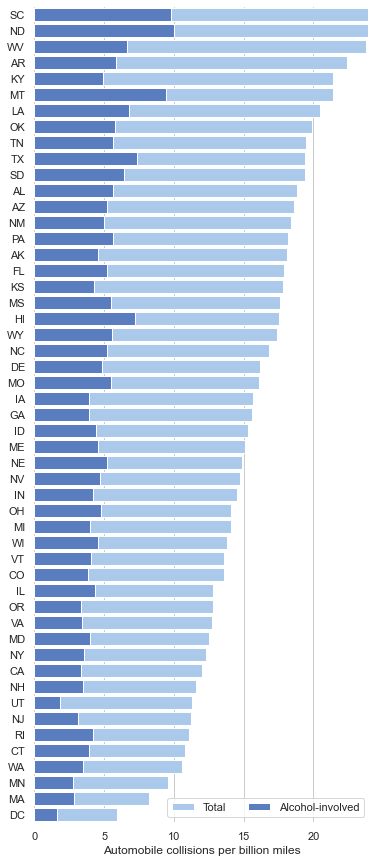

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [92]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [47]:
agg

,index,state,amountPaidOnBuildingClaim
0,0,AK,21835.028520
1,1,AL,28059.958432
2,2,AR,22287.836402
3,3,AZ,15715.728920
4,4,CA,16807.407860
5,5,CO,22872.460215
6,6,CT,21553.482145
7,7,DE,14868.689866
8,8,FL,25351.944087
9,9,GA,23427.594228


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)